In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [4]:
data = pd.read_csv("bank-full.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
from sklearn import preprocessing

In [6]:
label_encoder = preprocessing.LabelEncoder()
data['job'] = label_encoder.fit_transform(data['job'])
data['marital'] = label_encoder.fit_transform(data['marital'])
data['education'] = label_encoder.fit_transform(data['education'])
data['default'] = label_encoder.fit_transform(data['default'])
data['housing'] = label_encoder.fit_transform(data['housing'])
data['loan'] = label_encoder.fit_transform(data['loan'])
data['contact'] = label_encoder.fit_transform(data['contact'])
data['month'] = label_encoder.fit_transform(data['month'])
data['poutcome'] = label_encoder.fit_transform(data['poutcome'])
data['y'] = label_encoder.fit_transform(data['y'])

In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [8]:
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


<Axes: xlabel='y', ylabel='age'>

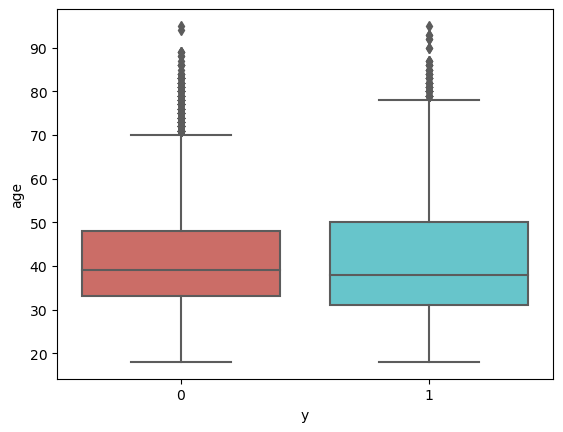

In [10]:
sn.boxplot(x="y" ,y="age" ,data=data, palette="hls")
# with this vizualtion we can understand the age profile of customers who have and don't have a term deposit

<Axes: xlabel='y', ylabel='count'>

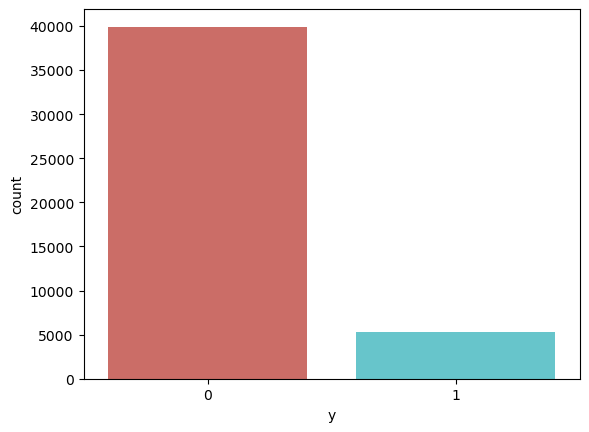

In [11]:
sn.countplot(x="y" ,data=data ,palette="hls")
#using this vizualization we can count how many people have or don't have a term deposit

In [12]:
pd.crosstab(data.y, data.loan)

loan,0,1
y,,
0,33162,6760
1,4805,484


<Axes: xlabel='y'>

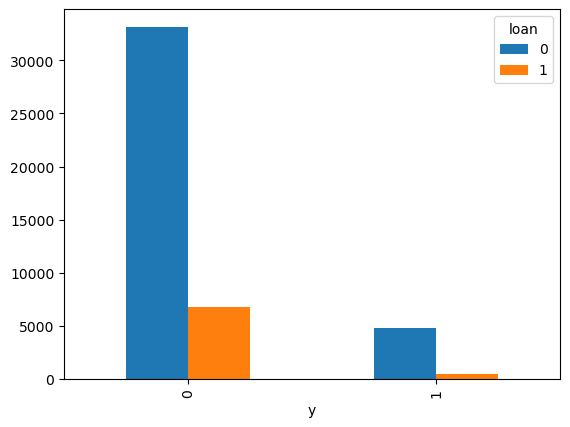

In [13]:
pd.crosstab(data.y, data.loan).plot(kind = 'bar')

In [14]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [16]:
data.shape

(45211, 17)

In [18]:
X = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
Y = data.iloc[:,16]
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
classifier.coef_

array([[-3.16741388e-02,  1.45373645e-02, -9.21071923e-02,
        -1.31802973e-02, -4.79243706e-03,  3.99894178e-05,
        -1.81550412e-01, -5.34898471e-02, -1.86711134e-01,
        -8.41582337e-03, -6.01159664e-02,  3.27077501e-03,
        -2.67004658e-01, -1.23878999e-03,  1.19977084e-01,
        -1.80536796e-01]])

In [20]:
classifier.predict_proba (X)

array([[0.94852967, 0.05147033],
       [0.94887641, 0.05112359],
       [0.94695691, 0.05304309],
       ...,
       [0.67198006, 0.32801994],
       [0.94034262, 0.05965738],
       [0.58197928, 0.41802072]])

In [21]:
y_pred = classifier.predict(X)
data["y_pred"] = y_pred
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,0
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,0
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,0
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,0


In [22]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([data,y_prob],axis=1)
new_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred,0,1
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0,0.948530,0.051470
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0,0.948876,0.051124
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0,0.946957,0.053043
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0,0.960854,0.039146
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0,0.903414,0.096586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,0,0.615496,0.384504
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,0,0.920163,0.079837
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,0,0.671980,0.328020
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,0,0.940343,0.059657


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39279   643]
 [ 4438   851]]


In [25]:
pd.crosstab(Y,y_pred)

col_0,0,1
y,,
0,39279,643
1,4438,851


In [26]:
accuracy = sum(Y==y_pred)/data.shape[0]
accuracy

0.8876158457012674

In [27]:
print (classification_report (Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score

0.5723967867991099

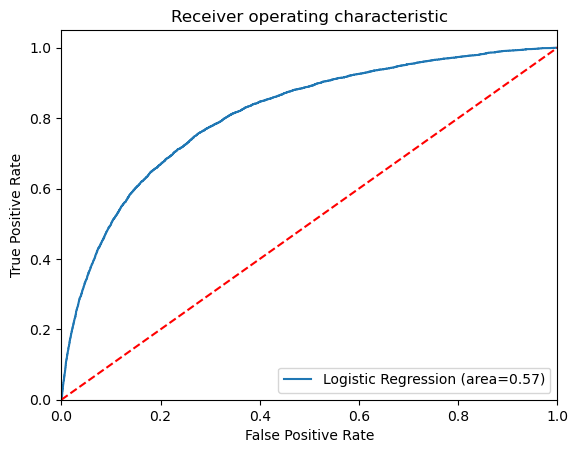

In [29]:
fpr, tpr, threshold = roc_curve(Y,classifier.predict_proba(X)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [31]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1])
y_prob1

,0
0,0.051470
1,0.051124
2,0.053043
3,0.039146
4,0.096586
...,...
45206,0.384504
45207,0.079837
45208,0.328020
45209,0.059657


In [33]:
import statsmodels.api as sm

In [34]:
logit = sm.Logit(Y, X)

In [35]:
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.276364
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Sun, 04 Feb 2024   Pseudo R-squ.:                  0.2342
Time:                        14:41:51   Log-Likelihood:                -12495.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0235      0.001    -18.322      0.000      -0.026      -0.021
job           -0.0157      0.005     -3.051      0.002      -0.026      -0.006
marital       -0.1877      0.026     -7.181      0.000      -0.239      -0.136
education      0.0308      0.022      1.389      0.165      -0.013       0.074
default       -0.4022      0.159     -2.534      0.011      -0.713      -0.091
balance     1.978e-05   4.51e-06      4.381      0.000    1.09e-05    2.86e-05
housing       -1.2719      0.037    -34.810      0.000      -1.343      -1.200
loan          -0.8290      0.056    -14.696      0.000      -0.940      -0.718
contact       -0.5961      0.027    -22.449      0.000      -0.648      -0.544
day           -0.0169      0.002     -8.524      0.000      -0.021      -0.013
month          0.0054      0.005      1.013      0.311      -0.005       0.016
duration       0.0038   6.01e-05     63.105      0.000       0.004       0.004
campaign      -0.1682      0.011    -15.928      0.000      -0.189      -0.147
pdays          0.0002      0.000      0.878      0.380      -0.000       0.001
previous       0.0548      0.008      6.879      0.000       0.039       0.070
poutcome      -0.2257      0.022    -10.244      0.000      -0.269      -0.183
==============================================================================
"""